GRIP : The Sparks Foundation
----
#GRIPDECEMBER22

__Name: Amritha Prakash__

Data Science and Business Intelligence Internship


__Task 1 - Prediction using Supervised ML__

Task - 
Predict the percentage of a student based on number of Study hours.    
This is a simple Linear Regression task as it involves only 2 variables i.e. Scores (dependent) and  Hours (independent).   
Data can be found at : http://bit.ly/w-data (given)   
what would be the score if a student studies for 9.25 hrs/day

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

__#Reading the data from url__

In [2]:
#Saving URL link to a variable named url
url = "https://bit.ly/w-data"

#reading the csv file from the given url and stores into a DataFrame
Dataset= pd.read_csv(url)

#printing first 5 records of the data frame
print(Dataset.head())
print("\nData imported successfully")

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Data imported successfully


__#Cleaning Data__

In [3]:
#checking for null values in the dataset
Dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
#checking for duplicate values in the dataset
Dataset.duplicated().sum()

0

__#Exploratory Data Analysis (EDA)__

In [5]:
#Data size
Dataset.shape
#DataFrame consists of 2 columns and 25 rows

(25, 2)

In [6]:
# Information regarding the entire Dataframe, i.e. data types of each column
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Describing the Dataset - i.e. overall count, mean, standard deviation, minimum, 25%, 50%, 75% and max of data values
Dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


__#Data Visualization__

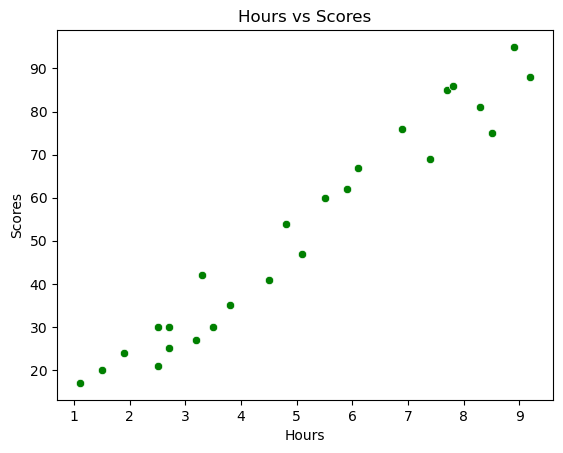

In [8]:
# For better understanding on relationship between hours of study and scores, plotting a Scatter Plot
sns.scatterplot(x='Hours', y='Scores', data= Dataset,color='g')
plt.title("Hours vs Scores")
plt.show()

In [9]:
# From the visualisation can understand that it is a Positive Linear Relation that exists between Hours and Scores

In [10]:
#Another way to find the extent to which two variables are linearly related is by using Correlation.
df=Dataset.corr(method='pearson')

In [11]:
df

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


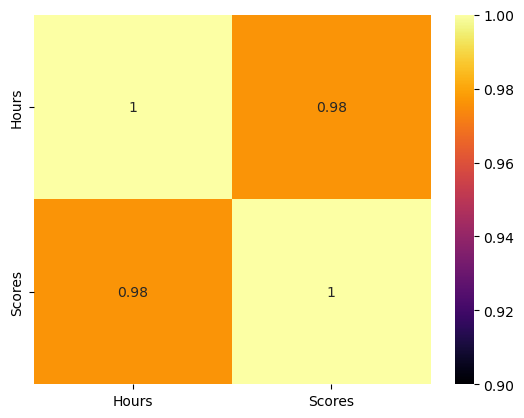

In [12]:
sns.heatmap(df,cmap='inferno',annot=True, vmin=0.9,vmax=1)
plt.show()
#help(sns.heatmap)

In [13]:
# It also proves that Hours and Scores are positively linearly related.

__#ML -__

In [14]:
#Preparing Data 

#Splitting the data into Independent and Dependent Variables.
X=Dataset.iloc[:,:-1].values
y=Dataset.iloc[:,-1].values
print("Independent variable Values (Hours):\n", X)
print("\nDependent variable Values (Scores):\n", y)

Independent variable Values (Hours):
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

Dependent variable Values (Scores):
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [15]:
#Splitting the Dataset for Training and Testing Purpose
# Assuming Training size as 80%, i.e. 0.8 of data will be considered as Train data and remaining 0.2 as Test data 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80)
print("Training set contains ",len(X_train))
print("Testing set contains ",len(X_test))

Training set contains  20
Testing set contains  5


__#Training the Algorithm__

In [16]:
# Model used for Training : Linear Regression, since it is linearly positive relationship

lr_model = LinearRegression()
model = lr_model.fit(X_train, y_train)

In [17]:
# SLOPE 
model.coef_ 

array([9.66305952])

In [18]:
# Y Intercept (c)
model.intercept_

2.901008362026559

In [19]:
#Regression Line
line= model.coef_*X+model.intercept_


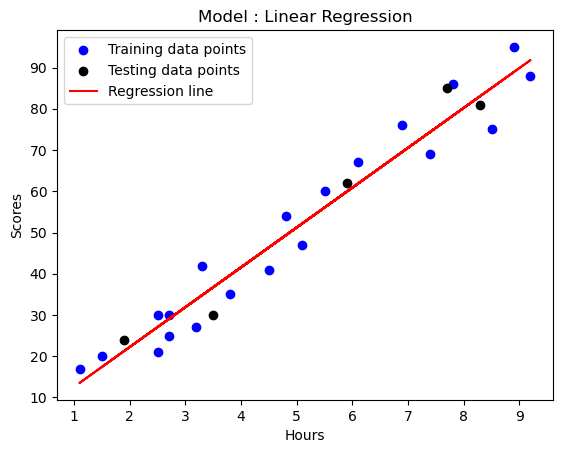

In [20]:
# Plotting for the test data
plt.scatter(X_train, y_train,c="b",label="Training data points")
plt.scatter(X_test,y_test,c="black",label="Testing data points")
plt.plot(X, line,c="red",label="Regression line")
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Model : Linear Regression")
plt.show()

In [21]:
#Making Predictions using the model for X_test
Y_predict_test = model.predict(X_test)


In [22]:
#Actual values and Predicted values 
data=pd.DataFrame({'Actual':y_test,'Predicted':Y_predict_test})
data
     

,Actual,Predicted
0,30,36.721717
1,62,59.913060
2,24,21.260821
3,85,77.306567
4,81,83.104402


In [23]:
# Accuracy score of training and testing data set
print("Training Accuracy Score:",round(model.score(X_train,y_train)*100,2),"%")
print("Testing Accuracy score:",round(model.score(X_test,y_test)*100,2),"%")

Training Accuracy Score: 94.96 %
Testing Accuracy score: 96.23 %


__#Evaluating the Model__

In [24]:
r2score=r2_score(y_test,Y_predict_test)
mean_abs_error=mean_absolute_error(y_test,Y_predict_test)
root_mean_squ_error= mean_squared_error(y_test,Y_predict_test,squared=False)

print("Root Mean Squared Error:",root_mean_squ_error) 

print("R2 score:",r2score)

print("Mean Absolute Error",mean_abs_error)


Root Mean Squared Error: 4.912378665912954
R2 score: 0.9623087214836362
Mean Absolute Error 4.269134284308903


In [25]:
#Evaluation step is particularly important to compare how well different algorithms perform on a particular dataset.

#Root Mean Squared error is how far predictions fall from measured true values using Euclidean distance, it is 4.91
#R2 score i.e. Coefficient of Determination is 96.2% 
#Mean Absolute error is the average of all errors, the value is only 4.269 .

__#Predicting the Result using the Model__

In [26]:
hours = [[9.25]]
own_pred_score = model.predict(hours)

print("Predicted Score  of the student who studied for {} hrs is {}".format(hours[0][0],round(own_pred_score[0],3)))

Predicted Score  of the student who studied for 9.25 hrs is 92.284
